## Step 8: Test on real data

Get public sentiment of omicron through Twitter and Google news APIs to corroborate if public reaction is similar to news coverage

1.   Link, source and date of release etc are obtained from the API
2.   The links are passed to **newspaper** library to get title, keywords,summary etc
1.   All results are written into a text file for easy access

NOTE: Certain websites, like Fox news do not allow access to their data.

#References
1. https://github.com/codelucas/newspaper
2. https://www.geeksforgeeks.org/newspaper-article-scraping-curation-python/
3. https://newspaper.readthedocs.io/en/latest/
4. https://github.com/johnbumgarner/newspaper3_usage_overview
5. https://towardsdatascience.com/detecting-fake-news-with-and-without-code-dd330ed449d9
6. https://towardsdatascience.com/twitter-sentiment-analysis-based-on-news-topics-during-covid-19-c3d738005b55
7. Compare formal news to public opinion: https://www.sciencedirect.com/science/article/pii/S2352340920310738
8. https://towardsdatascience.com/how-to-build-a-dataset-from-twitter-using-python-tweepy-861bdbc16fa5

In [ ]:
!pip install newspaper3k
!pip install GoogleNews
!pip install twython
!pip install googlesearch

     |████████████████████████████████| 211 kB 13.1 MB/s 
     |████████████████████████████████| 7.4 MB 62.2 MB/s 
     |████████████████████████████████| 81 kB 6.1 MB/s 
     |████████████████████████████████| 87 kB 4.4 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=67d043168f062eaa17f7bcefd2695aae60b0532982ec10c89f3ec2a95401cc84
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=3be9cfc9940f53202c63bffe6276118337454121f107373ebdcee349ec9e7a25
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=f031bb8afbc3df8ec912520efb622b9da49ff105becaac49db92766cdb387239
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a59795743

In [ ]:
# Import modules
from GoogleNews import GoogleNews
from datetime import date
from newspaper import Article
import nltk
import requests
from newspaper import fulltext
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import re
from textblob import TextBlob
from googlesearch import search

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Function to get news links for user specified hashtag, from **GOOGLE NEWS** for the past 7 days

**Newspaper3k** library gets a summary of the article and its keywords 

**Textblob** is used for sentiment analysis. It analyzes if news is positive, negative or neutral

In [ ]:
def Get_Google_News(company):
  print("\nStart: Getting Google news data")
  # Search for latest news for a company for today
  today = date.today()
  results = 0.0
  # Convert date to dd/mm/yyyy format
  today = today.strftime("%d/%m/%Y")
  today = str(today)
  # Create an object for google news to search
  # Refer to https://pypi.org/project/GoogleNews/ for more attributes
  google_client = GoogleNews(lang='en',period='7d',end=today,encode='utf-8')
  # Create an instance 
  google_client.search(company)
  f = open('News.txt','w')
  f.write('Latest news for '+company+'\n')
  f.write('\n')
  # Display date, media, title and link for news on SII Google News API
  for item in google_client.results():
      start = time.time()
      #print(item)
      url = str(item['link'])
      # Link to article
      f.write("Link: "+url)
      f.write('\n')
      # Get text in article 
      try:
        html = requests.get(url).text
        text = fulltext(html)
        text1 = cleanText(text)
        results = results + getPolarity(text1)
      except:
        f.write('\n Link not accessible\n')
      # Source (Name of company)
      f.write("Source: "+item['media'])
      f.write('\n')
      # Date of release
      f.write("Date of release: "+item['date'])
      datetime = str(item['datetime'])
      f.write('('+datetime+')')
      f.write('\n')
      try:
          # Read the article to get keywords, summary, authors etc
          article = Article(url)
          article.download()
          article.parse()
          # Natural language processing of article (inbuilt)
          article.nlp()
          f.write('Title: '+article.title)
          f.write('\n')
          f.write('Summary: '+article.summary)
          f.write('\n')
          # Prints all text written on page
          #print(article.text)
          f.write('Keywords: ')
          # Write each word in list to file, as list cannot be appended
          for word in article.keywords:
              f.write(word)
              f.write(', ')
          f.write('\n')
          f.write('\n')
      except:
          print(url,' access restricted\n')
      end = time.time()
      print("Runtime for Google news: ",(end-start))
      print ("End: Data collection from url ",url)
      print('\n')
  # Get sentiment analysis value for all news articles
  news_sentiment = getAverageSentiment(results)
  f.write('\n Sentiment analysis for term: '+news_sentiment+'\n')
  print('Sentiment analysis for term: ',news_sentiment)
  print('Value = ',results,'%')
  f.close()
  print('End: Getting Google news data\n')
  # End of function

## Step 9: Data cleaning

In [ ]:
# Clean up all the text
def cleanText(text):
  text = re.sub("https?:\/\/\S+", "", text) # removing hyperlink
  text = re.sub("\n"," ",text) # removing nextline characters
  return text

## Step 10: TextBlob and VADER Sentiment analysis

TextBlob - Lexicon based sentiment analyser

In [ ]:
# Get sentiment for all text
def getPolarity(text):
  # -1 negative sentiment, 0 - neutral, 1 - positive sentiment 
  return TextBlob(text).sentiment.polarity 

In [ ]:
# Output for average sentiment
def getAverageSentiment(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
# Google search for all possible twitter profiles of person
def Get_Twitter_Links(data):
    print("Start: Google search for twitter usernames")
    start = time.time()
    # "twitter" in query ensures all links are from twitter 
    query = '"twitter" '+data
    twitter_list = []
    for link in search(query,lang='en',num=10,stop=10):
      twitter_list.append(link)
    # Display links got so far
    #print(twitter_list)
    end = time.time()
    # Display execution time for Google search
    print("Runtime for Google search: ",(end-start))
    print("End: Google search for twitter usernames")
    return twitter_list

In [ ]:
def Get_Usernames(twitter_links):
  usernames_list = []
  for url in twitter_links:
    # After this link, username appears
    part = url.split('https://twitter.com/')
    try:
      name = part[1]
      # Get username
      username = name.split('?')[0]
      # Take only username with no special characters
      if username.find("status/") == -1:
        if "?" or "%" not in username:
          usernames_list.append(username)
    except:
      # Skip the link
      print()
  return usernames_list

In [ ]:
# Get tweets from personal account
def Get_Person_Twitter(usernames_list,bearer_token):
    print("Start: Getting tweets\n")
    start = time.time()
    f = open('Twitter.txt','w')
    # Date is used to get all tweets since account opening for sentiment analysis
    person_created_date = ''
    # Bearer token needs to be refreshed regularly (10 days)
    headers = {
        'Authorization' : bearer_token
    }

    # Find all twitter details for a person (name, username, date of creation etc)
    #personURL = "https://api.twitter.com/2/users/by"
    personURL = 'https://api.twitter.com/1.1/search/tweets.json'

    # Get data for all usernames in the list
    for person in usernames_list:
      person_params={
          "usernames": person,
          "user.fields": "created_at,description,location,verified,profile_image_url",
          "expansions": "pinned_tweet_id",
          "tweet.fields": "author_id,text",
      }
      response = requests.request("GET", url=personURL,params=person_params, headers=headers)
      response = response.json()
      if 'errors' in response:
          # Account has been suspended/not on twitter
          f.write(person+' not found on Twitter\n') 
      else:
        f.write('\nData for '+person+' found on Twitter\n') 
        for item in response['data']:
            if item['name']:
                f.write('Name: '+item['name'])
                f.write('\n')
            if item['username']:
                f.write('Twitter username: '+item['username'])
                person_twitter_username = item['username']
                f.write('\n')
            if item['id']:
                f.write('Twitter user id: '+item['id'])
                f.write('\n')
            if item['profile_image_url']:
                f.write('Profile picture link: '+item['profile_image_url'])
                f.write('\n')
            if item['verified']:
                f.write('Account verification: '+str(item['verified']))
                f.write('\n')
            if item['created_at']:
                f.write('Created date: '+item['created_at'])
                person_created_date = item['created_at']
                f.write('\n')
            if item['description']:
                f.write('Description: '+item['description'])
                f.write('\n')
            try:
              f.write('Location: '+item['location'])
              f.write('\n')
            except:
              f.write('Location not found\n')
        f.write('\n')
        # Find all tweets person has tweeted recently
        twitter_person = '#'+person
        params={
            'q':twitter_person,
            'count':'100',
            'lang':'en',
            'since_id':person_created_date
        }
        baseURL = 'https://api.twitter.com/1.1/search/tweets.json'
        response2 = requests.get(baseURL,params=params, headers=headers)
        response2 = response2.json()
        if response2['statuses'] == []:
            f.write('Person is not a regular twitter user. ')
            f.write('No recent tweets to display for '+person)
            f.write('\n')
    f.close()
    # Display time taken to run getting tweets
    end = time.time()
    print("Runtime for getting tweets: ",(end-start))
    print("\nEnd: Getting tweets\n")

# Driver code

In [ ]:
# Get name of company to search for
company = input("Enter company name: ")
person = input("Enter name of person to search for: ")

# Authenticate twitter access to API
bearer_token = 'Bearer AAAAAAAAAAAAAAAAAAAAAKrEMwEAAAAAt6s%2F2LYpHx0W64EkT15D2Zb9WCo%3DfQ1MPrip8XxDoBHAJmDsuTibSrk2e2DgolGSyghncNQFqFKSBj'

Enter company name: omicron
Enter name of person to search for: Narendra Modi


In [ ]:
# Get news for company
Get_Google_News(company)


Start: Getting Google news data
Runtime for Google news:  0.5242495536804199
End: Data collection from url  https://timesofindia.indiatimes.com/india/coronavirus-omicron-variant-india-11-feb-2022/liveblog/89490569.cms


Runtime for Google news:  0.5004551410675049
End: Data collection from url  https://www.itv.com/news/utv/2022-02-11/omicron-subvariant-virologist-warns-to-let-virus-circulate-would-be-dangerous


Runtime for Google news:  1.164675235748291
End: Data collection from url  https://www.begadistrictnews.com.au/story/7617876/does-a-third-vaccine-jab-make-a-difference-against-omicron/?cs=9676


Runtime for Google news:  0.9713320732116699
End: Data collection from url  https://www.youtube.com/watch?v=0r3-XpWlf-Q


Runtime for Google news:  0.9302060604095459
End: Data collection from url  https://www.nzherald.co.nz/nz/politics/covid-19-omicron-outbreak-parliament-protest-speaker-trevor-mallard-plays-barry-manilow-macarena-over-loud-speakers-to-deter-crowd/KRZ3NHOVFXS2GNPMDAWZ

In [ ]:
# Get person's and/or company's twitter usernames 

person_twitter = Get_Twitter_Links(person)
company_twitter = Get_Twitter_Links(company)
usernames = Get_Usernames(person_twitter)
usernames1 = Get_Usernames(company_twitter)

usernames.extend(usernames1)

# Display all usernames found on twitter for company
for user in usernames:
  print(user)

# Get all information on users from twitter
Get_Person_Twitter(usernames,bearer_token)  

Start: Google search for twitter usernames
Runtime for Google search:  2.702383041381836
End: Google search for twitter usernames
Start: Google search for twitter usernames
Runtime for Google search:  2.6694772243499756
End: Google search for twitter usernames

narendramodi
pmoindia
narendramodi/with_replies
search
Start: Getting tweets

Runtime for getting tweets:  0.7197630405426025

End: Getting tweets



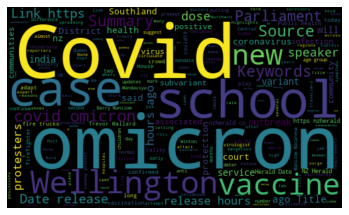

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Prepare wordcloud of words seen in news
news_content = open('News.txt').read()
#print(news_content)
# Create map of all words, with important words in larger font
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(news_content)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

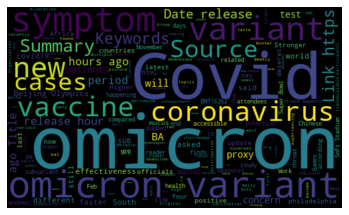

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Prepare wordcloud of words seen in Twitter
news_content = open('Twitter.txt').read()
#print(news_content)
# Create map of all words, with important words in larger font
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(news_content)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()